### Feb 13 - 2023
# Repaso y cosas nuevas de python
Para empezar, es importante resaltar la manera en la que se crean variables en python. Cuando creamos una variable el lenguaje lo caracteriza de manera que crea el tipo de variable dependindo de como dimos la información, es decir, sin decirlo explicitamente,

In [2]:
x = 5
y = 5.1
print('la variable x=',x,'es de tipo',type(x))
print('la variable y=',y,'es de tipo',type(y))

la variable x= 5 es de tipo <class 'int'>
la variable y= 5.1 es de tipo <class 'float'>


esto es importante de ver, ya que esto puede influir en la eficiencia de nuestro codigo o en la manipulación de variables que estamos realizando.
Por otra parte, una variable no solo se distingue por su nombre si no tambien por donde se encuentra. Es por esto que debemos tener cuidado de las librerias u herramientas de computo que utilizamos con el fin de optimizar memoria. Es por esto que realizar manipulación de arreglos con numpy o math es diferente, ya que cada uno maneja los arreglos diferentes repercutiendo en la memoria cache, en el caso de numpy toda la info se encuentra en la cache y en el caso de math debemos sacar informaciónd de la Ram, lo que puede ser mucho más demorado.

Por otra parte, es posible ver la manera en que se identifican las variables utilizando la función `id()`, devolviendo la dirección de memoria en la que se encuentra la variable, como sigue:

In [5]:
print('el id o identificador de la variable x es',id(x))

el id o identificador de la variable x es 139739776797104


In [4]:
# Qué hace la función 
help(id) 

Help on built-in function id in module builtins:

id(obj, /)
    Return the identity of an object.
    
    This is guaranteed to be unique among simultaneously existing objects.
    (CPython uses the object's memory address.)



In [9]:
print(id(x == y))   #Dirección de memoria
print(type(x == y)) #Tipo de variable

7637920
<class 'bool'>


Ahora, la forma en que se muestran cosas en la pantalla se pueden relizar de manera mas sencilla utilizando f-string como sigue

In [10]:
var = input("Please write something :\t") #nos pide un input y lo llama var
print("You have written : " + var)        #una forma de imprimir   
print(f"You have written : {var}")        #Forma de imprimir utilizando f-string que pude ser más eficiente

Please write something :	hello word
You have written : hello word
You have written : hello word


In [11]:
x1 = 5
y1 = 2.34
print("x = %04d \t y = %.1f \n y=%20.16e\n"%(x, y, y)) #Sintaxis complicada
print(f"x = {x:04d} \t y = {y:.1f} \n y={y:20.16e}")   #Aqui imprimo utilizando f-strign y resulta más eficiente 

x = 0005 	 y = 5.1 
 y=5.0999999999999996e+00

x = 0005 	 y = 5.1 
 y=5.0999999999999996e+00


Como ejemplo de como utilizar f-string, esta el siguiente, donde se evidencia que incluso se pueden hacer operaciones dentro del string

In [17]:
x = 5.0
y = -4.64
###.5f nos dice 5 decimales y es flotante
###010 nos da 10 espacios repletos de ceros
###10 nos da 10 espacios sin especificar con que lo rellena
###\n nos da un espacio
print(f"x = {x} y = {y}\n x+y = {x+y:010.5f}\n x+y = {x+y:10.5f}") 

x = 5.0 y = -4.64
 x+y = 0000.36000
 x+y =    0.36000


### abril 14 - 2023
# Metodos Runge-Kutta para ecuaciones acopladas y de segundo orden
Vamos a resolver el siguiente problema de una ecuación diferencial ordinaria 
$$ \frac{dy}{dx}=\left(1+2x\right)\sqrt{y}  $$
donde $y\left(0\right)=1$. Resolveremos esta ecuación por medio de:
* Una solución analitica.
* Método de Euler $n=0.01$
* Método del punto medio $h=0.01$
* Método del RK4 $h=0.01$
y veamos que esto nos da una buena aproximación. 

In [1]:
#Libreriras 
import numpy as np 
import matplotlib.pyplot as plt

In [20]:
#Solución analitica
h = 0.01
N = int(1/h)
X = np.linspace(0,1,N)
Y_analitic = (2+ X + X**2)**2 /4


In [11]:
#Función de la ecuación diferencial 
def f(x,y):
    return (1+2*x)*(y**(1/2))

In [21]:
#Metodo de Euler
Y_euler = np.zeros(N)
Y_euler[0] = 1
x = 0
for i in range(0,N-1):
    x += h
    Y_euler[i+1] = Y_euler[i] + h*f(x,Y_euler[i])
    

In [ ]:
#Metodo de 

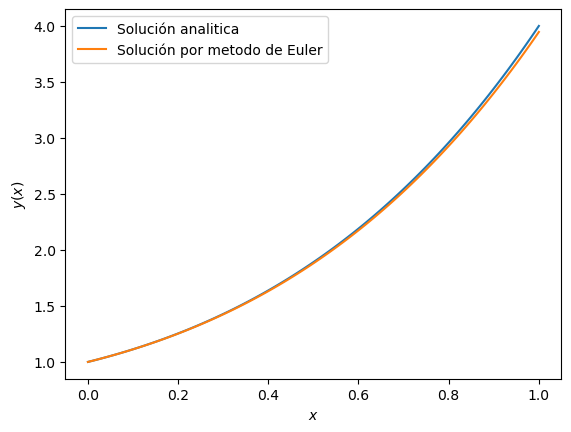

In [22]:
plt.plot(X,Y_analitic,label='Solución analitica')
plt.plot(X,Y_euler,label='Solución por metodo de Euler')
plt.xlabel(r'$x$')
plt.ylabel(r'$y\left(x\right)$')
plt.legend()
plt.show()